In [1]:
! pip install matplotlib

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

## Showing an example of an image with tensorflow and matplotlib

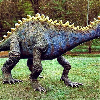

In [3]:
path = './dino-dragon/train/dino'
name = '864123f9-c1ae-4ad9-9498-a3bf9c72e737.jpg'
fullname = f'{path}/{name}'
load_img(fullname,target_size=(100, 100))

In [4]:
img=load_img(fullname,target_size=(100, 100))
array_img=np.array(img)

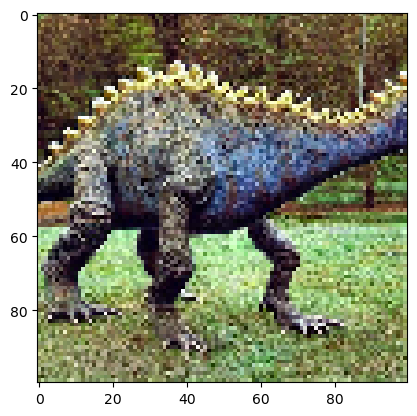

In [5]:
plt.imshow(array_img)

## Creating the model with keras

In [6]:
model = keras.models.Sequential([
    # n, (150,150,3)
    keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150, 150, 3)), # n, (148,148,32)
    keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2)), # n, (74,74,32)
    keras.layers.Flatten(), # n, (74*74*32 = 175232) 
    keras.layers.Dense(64,activation='relu'), # n, (64) 
    keras.layers.Dense(1,activation='sigmoid') # n, (1)
])

2022-12-21 20:12:33.083837: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-21 20:12:33.090187: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-21 20:12:33.090810: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-21 20:12:33.092035: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
____________________________________________

In [8]:
optimizer = keras.optimizers.SGD(lr=0.002, momentum=0.8)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


## Train and test datasets generators

In [17]:
train_gen=ImageDataGenerator(rescale=1./255)
test_gen=ImageDataGenerator(rescale=1./255)

In [18]:
train_ds = train_gen.flow_from_directory(
    './dino-dragon/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)
test_ds = test_gen.flow_from_directory(
    './dino-dragon/test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.


In [30]:
train_ds[0][0][0].shape

(150, 150, 3)

In [31]:
train_ds[0][1][0]

1.0

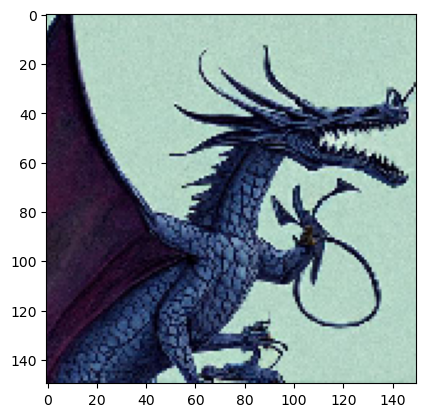

In [37]:
plt.imshow(train_ds[0][0][0])

## Training the model

In [38]:
history =model.fit(
        train_ds,
        epochs=10,
        validation_data=test_ds
    )

Epoch 1/10
50/50 [==============================] - 9s 172ms/step - loss: 0.2658 - accuracy: 0.8934 - val_loss: 0.3111 - val_accuracy: 0.8706
Epoch 2/10
50/50 [==============================] - 8s 168ms/step - loss: 0.2622 - accuracy: 0.8896 - val_loss: 0.3583 - val_accuracy: 0.8452
Epoch 3/10
50/50 [==============================] - 8s 168ms/step - loss: 0.2199 - accuracy: 0.9222 - val_loss: 0.3023 - val_accuracy: 0.8680
Epoch 4/10
50/50 [==============================] - 8s 169ms/step - loss: 0.2097 - accuracy: 0.9297 - val_loss: 0.3337 - val_accuracy: 0.8553
Epoch 5/10
50/50 [==============================] - 8s 168ms/step - loss: 0.1804 - accuracy: 0.9423 - val_loss: 0.3326 - val_accuracy: 0.8528
Epoch 6/10
50/50 [==============================] - 8s 169ms/step - loss: 0.1667 - accuracy: 0.9473 - val_loss: 0.3203 - val_accuracy: 0.8680
Epoch 7/10
50/50 [==============================] - 8s 168ms/step - loss: 0.1448 - accuracy: 0.9598 - val_loss: 0.2930 - val_accuracy: 0.8655
Epoch 

## Analyzing the poerformance of the model 

In [68]:
print("the mean of training accuracy : {:.3f}, the std of trainign accuracy : {:.3f}.".format(np.median(history.history['accuracy']),np.std(history.history['accuracy'])))

the mean of training accuracy : 0.945, the std of trainign accuracy : 0.029.


In [70]:
print("the mean of validation accuracy : {:.3f}, the std of validation accuracy : {:.3f}.".format(np.median(history.history['val_accuracy']),np.std(history.history['val_accuracy'])))

the mean of validation accuracy : 0.863, the std of validation accuracy : 0.012.


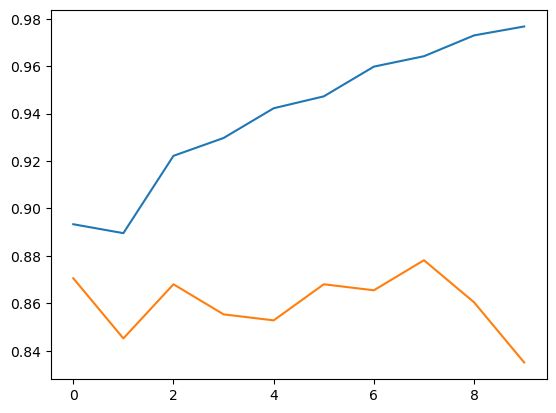

In [72]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

## Data Augmentation

In [108]:
train_gen=ImageDataGenerator(rescale=1./255,
                            rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')
test_gen=ImageDataGenerator(rescale=1./255)

In [109]:
train_ds = train_gen.flow_from_directory(
    './dino-dragon/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)
test_ds = test_gen.flow_from_directory(
    './dino-dragon/test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.


## Taking an example of image to illustrate the data augmentation

In [103]:
fnames = [os.path.join("./dino-dragon/train/dragon", fname) for
    fname in os.listdir("./dino-dragon/train/dragon")]
img_path = fnames[0]
img = load_img(img_path, target_size=(150, 150))

x = img_to_array(img)
x=x.reshape((1,) + x.shape)

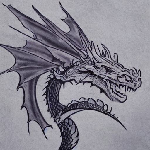

In [104]:
img

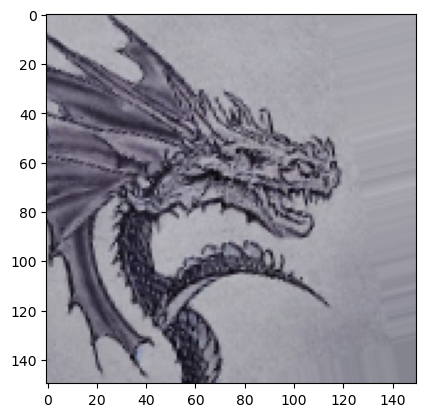

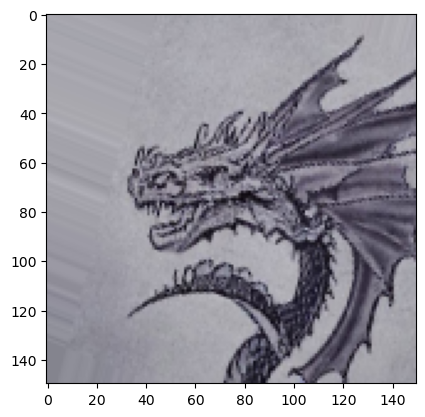

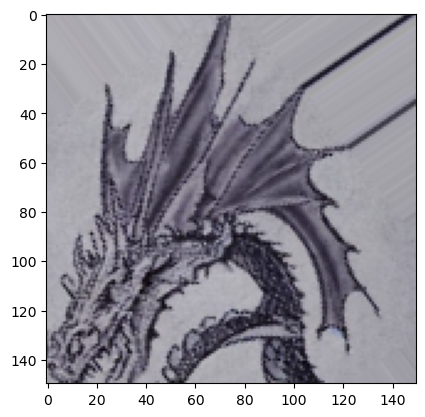

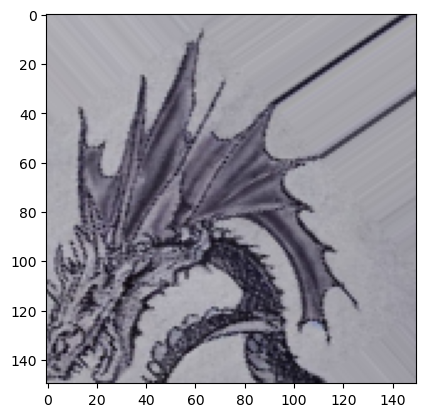

In [106]:
i=0
for batch in train_gen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(batch[0])
    i += 1
    if i % 4 == 0:
        break
plt.show()

## Training the model on the augmented data

In [110]:
history =model.fit(
        train_ds,
        epochs=10,
        validation_data=test_ds
    )

Epoch 1/10
50/50 [==============================] - 15s 300ms/step - loss: 0.4344 - accuracy: 0.7992 - val_loss: 0.3677 - val_accuracy: 0.8426
Epoch 2/10
50/50 [==============================] - 15s 295ms/step - loss: 0.4068 - accuracy: 0.8181 - val_loss: 0.3731 - val_accuracy: 0.8401
Epoch 3/10
50/50 [==============================] - 15s 296ms/step - loss: 0.3768 - accuracy: 0.8381 - val_loss: 0.2813 - val_accuracy: 0.8858
Epoch 4/10
50/50 [==============================] - 15s 298ms/step - loss: 0.3739 - accuracy: 0.8388 - val_loss: 0.3062 - val_accuracy: 0.8706
Epoch 5/10
50/50 [==============================] - 15s 299ms/step - loss: 0.3623 - accuracy: 0.8407 - val_loss: 0.5085 - val_accuracy: 0.7970
Epoch 6/10
50/50 [==============================] - 15s 301ms/step - loss: 0.3763 - accuracy: 0.8344 - val_loss: 0.5168 - val_accuracy: 0.7716
Epoch 7/10
50/50 [==============================] - 15s 300ms/step - loss: 0.3767 - accuracy: 0.8281 - val_loss: 0.2565 - val_accuracy: 0.8934

In [111]:
print("the mean of test loss : {:.3f}, the mean of test accuracy : {:.3f}.".format(np.mean(history.history['val_loss']),np.mean(history.history['val_accuracy'])))

the mean of test loss : 0.406, the mean of test accuracy : 0.829.


In [112]:
print("the average of test accuracy for the last 5 epochs : {:.3f}.".format(np.mean(history.history['val_accuracy'][5:10])))

the average of test accuracy for the last 5 epochs : 0.811.
